# Weight Regularization on an Avila Pattern Classifier

The Avila dataset has been extracted from 800 images of the Avila Bible, a giant 12th-century Latin copy of the Bible. The dataset consists of various features about the images of the text, such as intercolumnar distance and the margins of the text. The dataset also contains a class label that indicates if a pattern of the image falls into the most frequently occurring category or not. In this activity, you will build a Keras model to perform classification on this dataset according to given network architecture and hyperparameter values. The goal is to apply different types of weight regularization on the model and observe how each type changes the result.

In this activity, we will use the training set/test set approach to perform the evaluation for two reasons. First, since we are going to try several different regularizers, performing cross-validation will take a long time. Second, we would like to plot the trends in the training error and the test error in order to understand, in a visual way, how regularization prevents the model from overfitting to data examples.

### 1. Load the dataset from the data subfolder of Chapter05 from GitHub using X = pd.read_csv('../data/avila-tr_feats.csv') and y = pd.read_csv('../data/avila-tr_target.csv'). Split the dataset into a training set and a test set using the sklearn.model_selection.train_test_split method. Hold back 20% of the data examples for the test set.

In [15]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow import random
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 

SEED = 1

In [16]:
X = pd.read_csv('../data/avila-tr_feats.csv')
y = pd.read_csv('../data/avila-tr_target.csv')
print(X.shape)
print(y.shape)

(10430, 10)
(10430, 1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8344, 10) (2086, 10) (8344, 1) (2086, 1)


### 2. Define a Keras model with three hidden layers, the first of size 10, the second of size 6, and the third of size 4, to perform the classification. Use these values for the hyperparameters: activation='relu', loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'], batch_size=20, epochs=100, and shuffle=False.

In [18]:
np.random.seed(SEED)
random.set_seed(SEED)

model_1 = Sequential()
model_1.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model_1.add(Dense(6, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy',])

### 3. Train the model on the training set and evaluate it with the test set. Store the training loss and test loss at every iteration. After training is complete, plot the trends in training error and test error (change the limits of the vertical axis to (0, 1) so that you can observe the changes in losses better). What is the minimum error rate on the test set?

In [19]:
history = model_1.fit(
    x=X_train,
    y=y_train,
    batch_size=20,
    epochs=100,
    shuffle=False,
    validation_data=(X_test, y_test),
    verbose=1
)

Train on 8344 samples, validate on 2086 samples
Epoch 1/100
8344/8344 [==============================] - 1s 131us/step - loss: 0.6885 - accuracy: 0.5609 - val_loss: 0.6773 - val_accuracy: 0.5925
Epoch 2/100
8344/8344 [==============================] - 1s 98us/step - loss: 0.6760 - accuracy: 0.5905 - val_loss: 0.6741 - val_accuracy: 0.5973
Epoch 3/100
8344/8344 [==============================] - 1s 85us/step - loss: 0.6741 - accuracy: 0.5929 - val_loss: 0.6727 - val_accuracy: 0.5959
Epoch 4/100
8344/8344 [==============================] - 1s 83us/step - loss: 0.6723 - accuracy: 0.5924 - val_loss: 0.6703 - val_accuracy: 0.5973
Epoch 5/100
8344/8344 [==============================] - 1s 92us/step - loss: 0.6681 - accuracy: 0.5954 - val_loss: 0.6638 - val_accuracy: 0.6050
Epoch 6/100
8344/8344 [==============================] - 1s 84us/step - loss: 0.6611 - accuracy: 0.6019 - val_loss: 0.6555 - val_accuracy: 0.6088
Epoch 7/100
8344/8344 [==============================] - 1s 140us/step - lo

In [20]:
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.8029721975326538


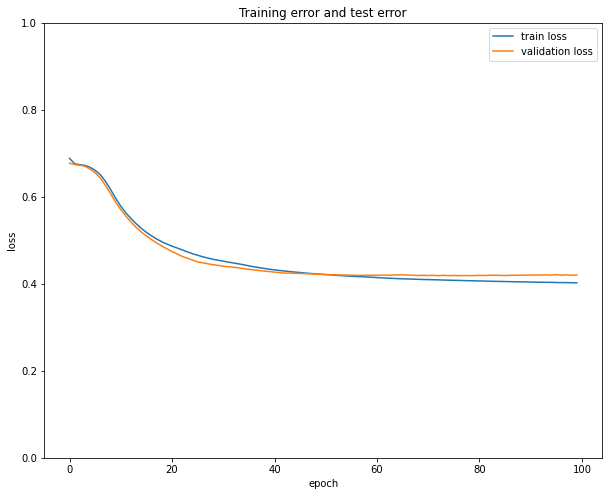

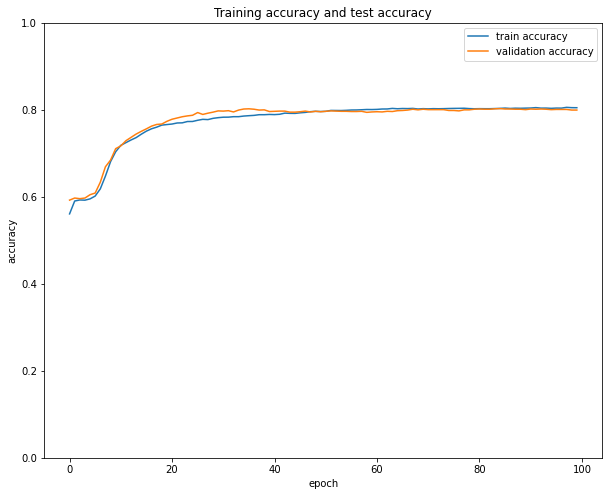

In [23]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

# plot training error and test error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.title('Training error and test error')
plt.show()

# plot training accuracy and test accuracy
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper right')
plt.title('Training accuracy and test accuracy')
plt.show()

### 4. Add L2 regularizers with lambda=0.01 to the hidden layers of your model and repeat the training. After training is complete, plot the trends in training error and test error. What is the minimum error rate on the test set?

Train on 8344 samples, validate on 2086 samples
Epoch 1/100
8344/8344 [==============================] - 1s 113us/step - loss: 0.8863 - accuracy: 0.5608 - val_loss: 0.8584 - val_accuracy: 0.5959
Epoch 2/100
8344/8344 [==============================] - 1s 87us/step - loss: 0.8433 - accuracy: 0.5910 - val_loss: 0.8280 - val_accuracy: 0.5906
Epoch 3/100
8344/8344 [==============================] - 1s 87us/step - loss: 0.8167 - accuracy: 0.5906 - val_loss: 0.8041 - val_accuracy: 0.5882
Epoch 4/100
8344/8344 [==============================] - 1s 87us/step - loss: 0.7947 - accuracy: 0.5899 - val_loss: 0.7838 - val_accuracy: 0.5887
Epoch 5/100
8344/8344 [==============================] - 1s 95us/step - loss: 0.7755 - accuracy: 0.5899 - val_loss: 0.7651 - val_accuracy: 0.5906
Epoch 6/100
8344/8344 [==============================] - 1s 99us/step - loss: 0.7587 - accuracy: 0.5896 - val_loss: 0.7496 - val_accuracy: 0.5911
Epoch 7/100
8344/8344 [==============================] - 1s 87us/step - los

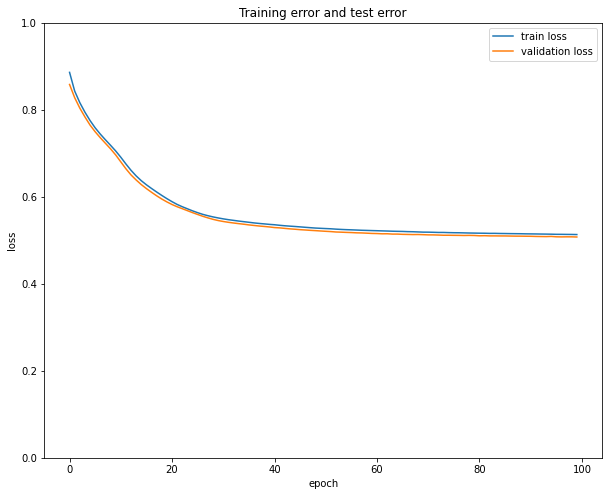

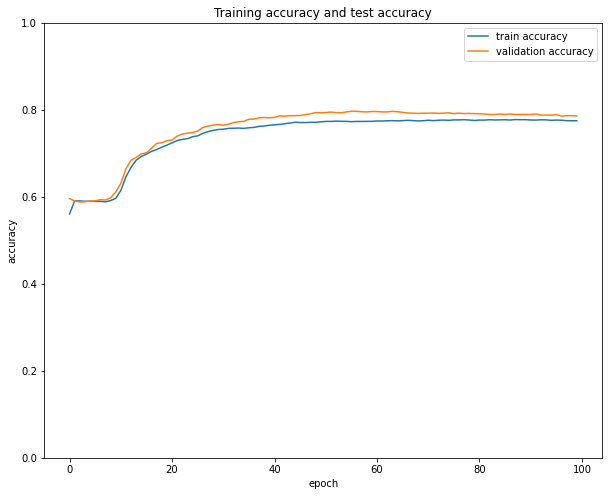

In [24]:
np.random.seed(SEED)
random.set_seed(SEED)

l2_param = 0.01

model_2 = Sequential()
model_2.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2_param)))
model_2.add(Dense(6, activation='relu', kernel_regularizer=l2(l2_param)))
model_2.add(Dense(4, activation='relu', kernel_regularizer=l2(l2_param)))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy',])

history_2 = model_2.fit(
    x=X_train,
    y=y_train,
    batch_size=20,
    epochs=100,
    shuffle=False,
    validation_data=(X_test, y_test),
    verbose=1
)

# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history_2.history['val_accuracy']))

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

# plot training error and test error
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.title('Training error and test error')
plt.show()

# plot training accuracy and test accuracy
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper right')
plt.title('Training accuracy and test accuracy')
plt.show()

### 5. Repeat the previous step for lambda=0.1 and lambda=0.005, train the model for each value of lambda, and report the results. Which value of lambda is a better choice for performing L2 regularization on this deep learning model and this dataset?

Train on 8344 samples, validate on 2086 samples
Epoch 1/100
8344/8344 [==============================] - 1s 102us/step - loss: 1.7383 - accuracy: 0.5659 - val_loss: 1.0826 - val_accuracy: 0.5911
Epoch 2/100
8344/8344 [==============================] - 1s 110us/step - loss: 0.8751 - accuracy: 0.5887 - val_loss: 0.7529 - val_accuracy: 0.5906
Epoch 3/100
8344/8344 [==============================] - 1s 89us/step - loss: 0.7145 - accuracy: 0.5887 - val_loss: 0.6910 - val_accuracy: 0.5906
Epoch 4/100
8344/8344 [==============================] - 1s 104us/step - loss: 0.6843 - accuracy: 0.5887 - val_loss: 0.6794 - val_accuracy: 0.5906
Epoch 5/100
8344/8344 [==============================] - 1s 105us/step - loss: 0.6787 - accuracy: 0.5887 - val_loss: 0.6772 - val_accuracy: 0.5906
Epoch 6/100
8344/8344 [==============================] - 1s 87us/step - loss: 0.6776 - accuracy: 0.5887 - val_loss: 0.6768 - val_accuracy: 0.5906
Epoch 7/100
8344/8344 [==============================] - 1s 95us/step - 

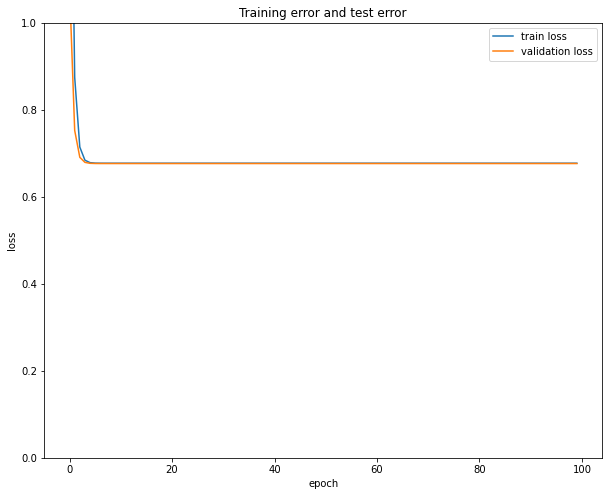

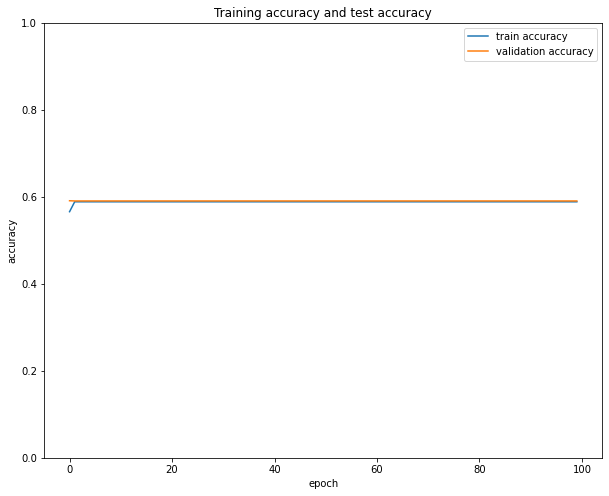

In [25]:
np.random.seed(SEED)
random.set_seed(SEED)

l2_param = 0.1

model_3 = Sequential()
model_3.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2_param)))
model_3.add(Dense(6, activation='relu', kernel_regularizer=l2(l2_param)))
model_3.add(Dense(4, activation='relu', kernel_regularizer=l2(l2_param)))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy',])

history_3 = model_3.fit(
    x=X_train,
    y=y_train,
    batch_size=20,
    epochs=100,
    shuffle=False,
    validation_data=(X_test, y_test),
    verbose=1
)

# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history_3.history['val_accuracy']))

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

# plot training error and test error
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.title('Training error and test error')
plt.show()

# plot training accuracy and test accuracy
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper right')
plt.title('Training accuracy and test accuracy')
plt.show()